In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Import the original images and cut them to size

Tower   has shape (576, 1024, 3) and dtype uint8
Dog     has shape (602, 1200, 3) and dtype uint8
New dog has shape (576, 1024, 3) and dtype uint8


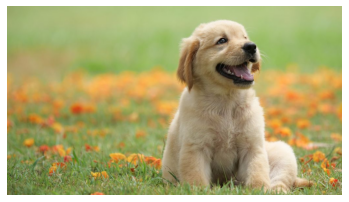

In [2]:
tower = plt.imread('original_images/tower.jpg')

height, width, channels = tower.shape
imagetype = tower.dtype
print(f"Tower   has shape {tower.shape} and dtype {tower.dtype}")

dog = plt.imread('original_images/dog.jpg')
print(f"Dog     has shape {dog.shape} and dtype {dog.dtype}")

dog = dog[0:height, 0:width]
print(f"New dog has shape {dog.shape} and dtype {dog.dtype}")

plt.imshow(dog)
plt.axis('off');

assert dog.shape == tower.shape
assert dog.dtype == tower.dtype

## Quantize into 4-bit color space
Using 4-bit color images = 8 bits of information

Bin edges:         [  0   1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33
  35  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69
  71  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105
 107 109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141
 143 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177
 179 181 183 185 187 189 191 193 195 197 199 201 203 205 207 209 211 213
 215 217 219 221 223 225 227 229 231 233 235 237 239 241 243 245 247 249
 251 253 255]
Test image values: [  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214

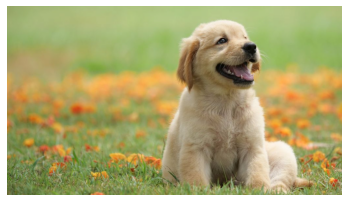

In [18]:
hidden_dog = dog.copy()
bits = 128
edges = np.linspace(start=0, stop=255, num=bits+1).astype(imagetype)
print(f"Bin edges:         {edges}")

for i in range(bits):
    low, high = edges[i], edges[i+1]
    in_interval = np.logical_and(low < dog, dog <= high)
    hidden_dog[in_interval] = i

step = 255.0 / bits
test_dog = (hidden_dog * 255.0 / hidden_dog.max()).astype(np.uint8)
plt.imshow(test_dog)
plt.axis('off')

print(f"Test image values: {np.unique(test_dog)}")
print(f"Hidden dog has dtype {hidden_dog.dtype}")
print("Successfully quantized dog image as", np.unique(hidden_dog))

plt.imsave('altered_images/dog.png', hidden_dog)

## Now use the reciprocal of the tower image

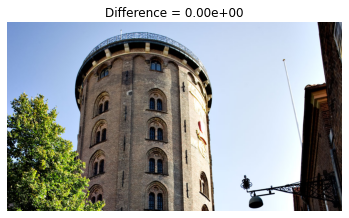

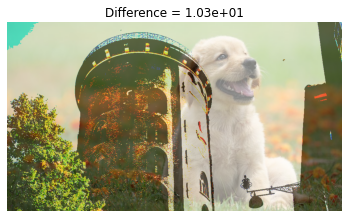

In [19]:
tower_quotient = tower // bits
tower_remainder = tower % bits

reconstructed_tower = (tower_quotient * bits + tower_remainder).astype(imagetype)  # Get the original image
reconstruction_difference = np.sqrt(np.mean(np.square(tower - reconstructed_tower)))

plt.imshow(reconstructed_tower)
plt.title(f'Difference = {reconstruction_difference:.2e}')
plt.axis('off')
plt.show()

new_tower = (tower_quotient * bits + hidden_dog).astype(imagetype) # Now contains remainder of dog image
reconstruction_difference = np.sqrt(np.mean(np.square(tower - new_tower)))

plt.imshow(new_tower)
plt.title(f'Difference = {reconstruction_difference:.2e}')
plt.axis('off')
plt.show();


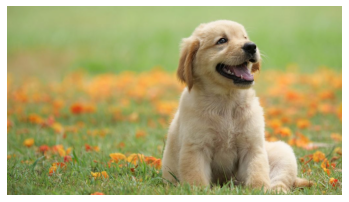

In [20]:
see_dog = ((new_tower % bits) * step).astype(np.uint8)

plt.imshow(see_dog)
plt.axis('off');

In [22]:
plt.imsave('altered_images/tower.tiff', new_tower)